Shiana Rodriguez Capstone Project

In [ ]:
!pip install pandas-profiling==2.7.1

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
%matplotlib inline 

In [ ]:
df = pd.read_excel('https://query.data.world/s/uemrh7gdiumh2tnzgga7rpyb4i5zpy')

In [ ]:
df.head(10)

,case,location,city,state,date,summary,fatalities,injured,total_victims,location.1,age_of_shooter,prior_signs_mental_health_issues,mental_health_details,weapons_obtained_legally,where_obtained,weapon_type,weapon_details,race,gender,sources,mental_health_sources,sources_additional_age,latitude,longitude,type,year
0,San Jose VTA shooting,"San Jose, California",San Jose,California,2021-05-26,"Samuel Cassidy, 57, a Valley Transportation Au...",9,0,9,Workplace,57,Yes,Perpetrator had a history of making people aro...,-,-,semiautomatic handguns,-,-,M,https://www.sfchronicle.com/crime/article/Mass...,https://www.nytimes.com/2021/05/26/us/what-hap...,-,37.316097,-121.888533,Mass,2021
1,FedEx warehouse shooting,"Indianapolis, Indiana",Indianapolis,Indiana,2021-04-15,"Brandon Scott Hole, 19, opened fire around 11 ...",8,7,15,Workplace,19,Yes,Perpetrator had been reported to police in 202...,yes,-,semiautomatic rifle,-,White,M,https://www.indystar.com/story/news/crime/2021...,https://www.nytimes.com/2021/04/19/us/indianap...,-,39.686630,-86.323130,Mass,2021
2,Orange office complex shooting,"Orange, California",Orange,California,2021-03-31,"Aminadab Gaxiola Gonzalez, 44, allegedly opene...",4,1,5,Workplace,-,-,-,-,-,semiautomatic handgun,-,-,M,https://www.latimes.com/california/story/2021-...,-,-,33.835420,-117.853790,Mass,2021
3,Boulder supermarket shooting,"Boulder, Colorado",Boulder,Colorado,2021-03-22,"Ahmad Al Aliwi Alissa, 21, carried out a mass ...",10,0,10,Workplace,21,Yes,Brother described him as paranoid; multiple ac...,Yes,-,"semiautomatic rifle, semiautomatic handgun; ta...",Ruger AR-556; weapon was purchased six days be...,-,M,https://www.denverpost.com/2021/03/22/police-a...,https://www.thedailybeast.com/boulder-colorado...,-,39.986961,-105.251168,Mass,2021
4,Atlanta massage parlor shootings,"Atlanta, Georgia",Atlanta,Georgia,2021-03-16,"Robert Aaron Long, 21, killed eight people at ...",8,1,9,Workplace,21,-,-,-,-,-,-,White,M,https://www.ajc.com/news/breaking-multiple-sho...,-,-,34.111653,-84.580376,Spree,2021
5,Springfield convenience store shooting,"Springfield, Missouri",Springfield,Missouri,2020-03-16,"Joaquin S. Roman, 31, went on a rampage culmin...",4,0,4,Workplace,31,-,-,-,-,-,-,-,M,https://www.kiro7.com/news/trending/ive-been-s...,-,-,37.210432,-93.236860,Mass,2020
6,Molson Coors shooting,"Milwaukee, Wisconsin",Milwaukee,Wisconsin,2020-02-26,"Anthony Ferrill, 51, an employee armed with tw...",5,0,5,Workplace,51,-,-,-,-,semiautomatic handgun,-,Black,M,https://www.jsonline.com/story/news/local/2020...,-,-,43.044511,-87.962537,Mass,2020
7,Jersey City kosher market shooting,"Jersey City, New Jersey",Jersey City,New Jersey,2019-12-10,"David N. Anderson, 47, and Francine Graham, 50...",4,3,7,Other,-,-,-,-,-,-,-,Black,Male & Female,https://www.nytimes.com/2019/12/15/nyregion/je...,-,-,40.707363,-74.083609,Spree,2019
8,Pensacola Naval base shooting,"Pensacola, Florida",Pensacola,Florida,2019-12-06,"Ahmed Mohammed al-Shamrani, A Saudi Arabian mi...",3,8,11,Military,-,-,-,-,-,semiautomatic handgun,-,-,M,https://www.washingtonpost.com/national-securi...,-,-,30.364707,-87.288567,Mass,2019
9,Odessa-Midland shooting spree,"Odessa, Texas",Odessa,Texas,2019-08-31,"Seth A. Ator, 36, fired at police officers who...",7,25,32,Other,36,Yes,"""One friend of the family said the gunman had ...",-,-,semiautomatic rifle,-,White,M,https://www.washingtonpost.com/politics/5-kill...,https://www.nytimes.com/2019/09/02/us/texas-gu...,-,31.925974,-102.279600,Spree,2019


In [ ]:
df.shape

(124, 26)

In [ ]:
df.describe()

,fatalities,injured,total_victims,latitude,longitude,year
count,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000
mean,8.032258,11.709677,19.741935,37.330528,-96.753336,2008.766129
std,7.766863,49.484296,54.932016,5.646158,17.880448,10.525315
min,3.000000,0.000000,3.000000,21.320063,-157.876462,1982.000000
25%,4.750000,1.000000,6.750000,33.776140,-117.370507,1999.750000
50%,6.000000,3.000000,10.000000,38.195115,-90.874832,2012.500000
75%,9.000000,10.000000,17.250000,41.431018,-81.438047,2017.000000
max,58.000000,546.000000,604.000000,48.461367,-71.075913,2021.000000


In [ ]:
import pandas_profiling as pp

In [ ]:
pp.ProfileReport(df)

Summarize dataset:   0%|          | 0/38 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In the event of Mass shootings, most mass shootings occurred in California. Most perpetrators are male, white, and are mentally ill. 

In [ ]:
df.columns

Index(['case', 'location', 'city', 'state', 'date', 'summary', 'fatalities',
       'injured', 'total_victims', 'location.1', 'age_of_shooter',
       'prior_signs_mental_health_issues', 'mental_health_details',
       'weapons_obtained_legally', 'where_obtained', 'weapon_type',
       'weapon_details', 'race', 'gender', 'sources', 'mental_health_sources',
       'sources_additional_age', 'latitude', 'longitude', 'type', 'year'],
      dtype='object')

In [ ]:
df.drop(columns=['sources','location','mental_health_sources','sources_additional_age','where_obtained', 'latitude','longitude'], inplace=True)

I decided to drop this columns, because they were not needed for my analysis. Although, the sources are revelant to see where the data comes from. 


In [ ]:
df.head()

,case,city,state,date,summary,fatalities,injured,total_victims,location.1,age_of_shooter,prior_signs_mental_health_issues,mental_health_details,weapons_obtained_legally,weapon_type,weapon_details,race,gender,type,year
0,San Jose VTA shooting,San Jose,California,2021-05-26,"Samuel Cassidy, 57, a Valley Transportation Au...",9,0,9,Workplace,57,Yes,Perpetrator had a history of making people aro...,-,semiautomatic handguns,-,-,M,Mass,2021
1,FedEx warehouse shooting,Indianapolis,Indiana,2021-04-15,"Brandon Scott Hole, 19, opened fire around 11 ...",8,7,15,Workplace,19,Yes,Perpetrator had been reported to police in 202...,yes,semiautomatic rifle,-,White,M,Mass,2021
2,Orange office complex shooting,Orange,California,2021-03-31,"Aminadab Gaxiola Gonzalez, 44, allegedly opene...",4,1,5,Workplace,-,-,-,-,semiautomatic handgun,-,-,M,Mass,2021
3,Boulder supermarket shooting,Boulder,Colorado,2021-03-22,"Ahmad Al Aliwi Alissa, 21, carried out a mass ...",10,0,10,Workplace,21,Yes,Brother described him as paranoid; multiple ac...,Yes,"semiautomatic rifle, semiautomatic handgun; ta...",Ruger AR-556; weapon was purchased six days be...,-,M,Mass,2021
4,Atlanta massage parlor shootings,Atlanta,Georgia,2021-03-16,"Robert Aaron Long, 21, killed eight people at ...",8,1,9,Workplace,21,-,-,-,-,-,White,M,Spree,2021


In [ ]:
df.isnull().sum()

case                                0
city                                0
state                               0
date                                0
summary                             0
fatalities                          0
injured                             0
total_victims                       0
location.1                          0
age_of_shooter                      0
prior_signs_mental_health_issues    0
mental_health_details               0
weapons_obtained_legally            0
weapon_type                         0
weapon_details                      0
race                                0
gender                              0
type                                0
year                                0
dtype: int64

According to this, there is no missing values. However when I look through the data set, I can see that there is missing values but in the form of "-" and not Na or NAN. 

In [ ]:
df.columns

Index(['case', 'city', 'state', 'date', 'summary', 'fatalities', 'injured',
       'total_victims', 'location.1', 'age_of_shooter',
       'prior_signs_mental_health_issues', 'mental_health_details',
       'weapons_obtained_legally', 'weapon_type', 'weapon_details', 'race',
       'gender', 'type', 'year'],
      dtype='object')

In [ ]:
df.rename(columns={"total_victims":"Total Victims", "location.1":"location", "age_of_shooter":"Age","prior_signs_mental_health_issues":"History of Mental Illness", "mental_health_details":"Mental Illness Details"}, inplace=True)

In [ ]:
df.head()

,case,city,state,date,summary,fatalities,injured,Total Victims,location,Age,History of Mental Illness,Mental Illness Details,weapons_obtained_legally,weapon_type,weapon_details,race,gender,type,year
0,San Jose VTA shooting,San Jose,California,2021-05-26,"Samuel Cassidy, 57, a Valley Transportation Au...",9,0,9,Workplace,57,Yes,Perpetrator had a history of making people aro...,-,semiautomatic handguns,-,-,M,Mass,2021
1,FedEx warehouse shooting,Indianapolis,Indiana,2021-04-15,"Brandon Scott Hole, 19, opened fire around 11 ...",8,7,15,Workplace,19,Yes,Perpetrator had been reported to police in 202...,yes,semiautomatic rifle,-,White,M,Mass,2021
2,Orange office complex shooting,Orange,California,2021-03-31,"Aminadab Gaxiola Gonzalez, 44, allegedly opene...",4,1,5,Workplace,-,-,-,-,semiautomatic handgun,-,-,M,Mass,2021
3,Boulder supermarket shooting,Boulder,Colorado,2021-03-22,"Ahmad Al Aliwi Alissa, 21, carried out a mass ...",10,0,10,Workplace,21,Yes,Brother described him as paranoid; multiple ac...,Yes,"semiautomatic rifle, semiautomatic handgun; ta...",Ruger AR-556; weapon was purchased six days be...,-,M,Mass,2021
4,Atlanta massage parlor shootings,Atlanta,Georgia,2021-03-16,"Robert Aaron Long, 21, killed eight people at ...",8,1,9,Workplace,21,-,-,-,-,-,White,M,Spree,2021


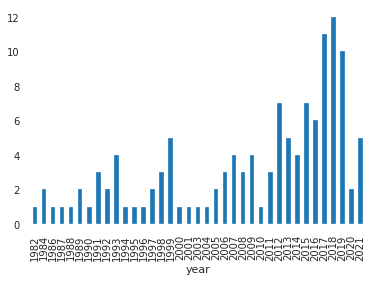

In [ ]:
df.groupby(['year'])['fatalities'].count().plot(kind="bar")

The year that had the most fatalities due to mass shootings was in 2018. The 
year with the least fatalities was in 2010. When comparing from decades ago, between the years 2011 to 2021 there's a big jump in mass shootings.

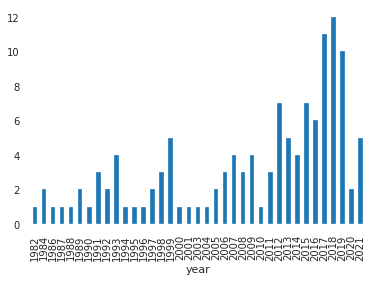

In [ ]:
df.groupby(['year'])['Total Victims'].count().plot(kind="bar")

The year 2018 had the most victims.

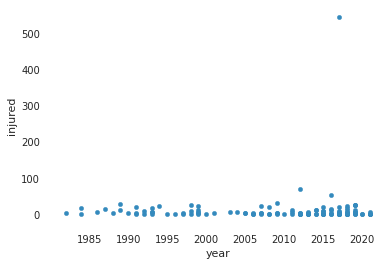

In [ ]:
df.plot(kind="scatter", x='year', y='injured')

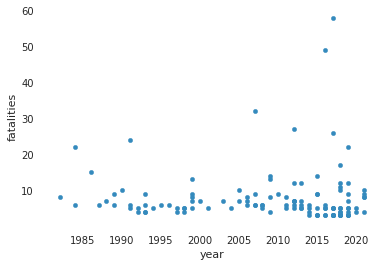

In [ ]:
df.plot(kind="scatter", x='year', y='fatalities')

In [ ]:
pd.set_option('display.max_rows', None)
df.groupby(['state', 'Age', 'gender', 'race', 'History of Mental Illness'])['year'].count()

state           Age  gender         race             History of Mental Illness
Arizona         22   Male           white            Yes                          1
Arkansas        11   Male           white            No                           1
California      19   M              -                TBD                          1
                20   Male           white            No                           1
                22   M              White            Yes                          1
                23   Male           White            Yes                          1
                26   Male           white            Yes                          1
                28   M              -                Yes                          1
                     Male & Female  Other            Unclear                      1
                36   M              Asian            Yes                          1
                38   M              Asian            Yes                         

In [ ]:
df.groupby(['state'])['Total Victims'].count()

state
Arizona            1
Arkansas           1
California        22
Colorado           7
Connecticut        3
D.C.               1
Florida           12
Georgia            3
Hawaii             1
Illinois           4
Indiana            1
Iowa               1
Kansas             1
Kentucky           2
Lousiana           1
Maryland           3
Massachusetts      1
Michigan           2
Minnesota          2
Mississippi        1
Missouri           2
Nebraska           1
Nevada             2
New Jersey         1
New York           4
North Carolina     2
Ohio               4
Oklahoma           1
Oregon             2
Pennsylvania       5
South Carolina     2
Tennessee          2
Texas             11
Utah               1
Virginia           2
Washington         7
Wisconsin          5
Name: Total Victims, dtype: int64

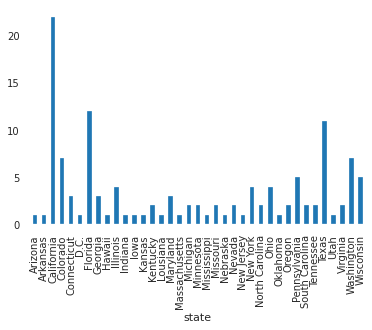

In [ ]:
df.groupby(['state'])['Total Victims'].count().plot(kind="bar")

The state with the most number of victims are from California. When looking at California state gun laws, they are the most regulated state when it comes to the sale, use, and posession of guns. 

In [ ]:
df2= df[df['state'] == 'California']

In [ ]:
df2.head()

,case,city,state,date,summary,fatalities,injured,Total Victims,location,Age,History of Mental Illness,Mental Illness Details,weapons_obtained_legally,weapon_type,weapon_details,race,gender,type,year
0,San Jose VTA shooting,San Jose,California,2021-05-26,"Samuel Cassidy, 57, a Valley Transportation Au...",9,0,9,Workplace,57,Yes,Perpetrator had a history of making people aro...,-,semiautomatic handguns,-,-,M,Mass,2021
2,Orange office complex shooting,Orange,California,2021-03-31,"Aminadab Gaxiola Gonzalez, 44, allegedly opene...",4,1,5,Workplace,-,-,-,-,semiautomatic handgun,-,-,M,Mass,2021
12,Gilroy garlic festival shooting,Gilroy,California,2019-07-28,"Santino William LeGan, 19, fired indiscriminat...",3,12,15,Other,19,TBD,-,Yes,semiautomatic rifle,"AK-47-style rifle, per authorities",-,M,Mass,2019
18,Thousand Oaks nightclub shooting,Thousand Oaks,California,2018-11-07,"Ian David Long, 28, dressed in black and armed...",12,22,34,Other,28,Yes,"Per the LATimes: ""Sheriff Geoff Dean said his ...",Yes,semiautomatic handgun,"Glock 21, .45 caliber; high-capacity magazine",-,M,Mass,2018
21,T&T Trucking shooting,Bakersfield,California,2018-09-12,"Javier Casarez, 54, who was going through a bi...",5,0,5,Workplace,54,-,-,Yes,handgun,Smith & Wesson Model 500 (.50-caliber revolver),Latino,M,Spree,2018


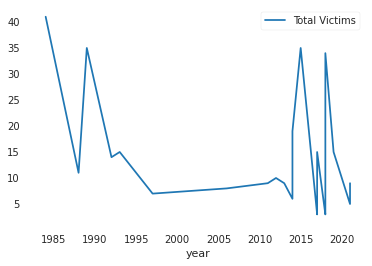

In [ ]:
df2.plot(y='Total Victims', x='year')

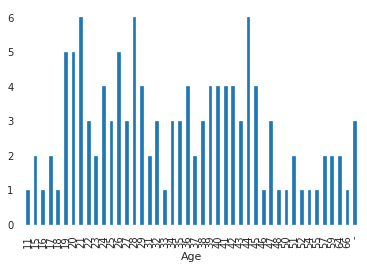

In [ ]:
df.groupby(['Age'])['Total Victims'].count().plot(kind="bar")

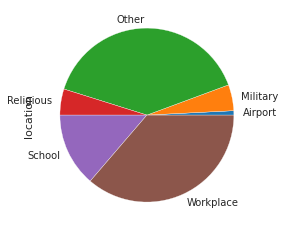

In [ ]:
df.groupby(['location'])['location'].count().plot(kind="pie")

In [ ]:
df.replace(['M'], ['Male'],inplace=True)

In [ ]:
df.replace(['F'], ['Female'],inplace=True)

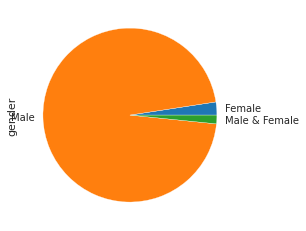

In [ ]:
df.groupby(['gender'])['gender'].count().plot(kind="pie")

In [ ]:
df.replace(['white'], ['White'],inplace=True)

In [ ]:
df.replace(['black'], ['Black'],inplace=True)

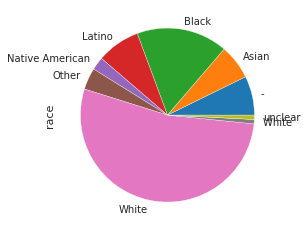

In [ ]:
df.groupby(['race'])['race'].count().plot(kind="pie")

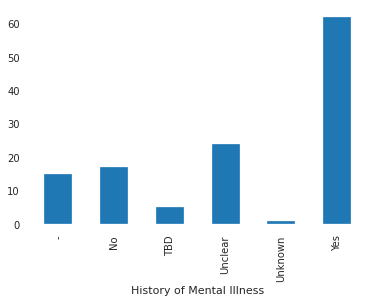

In [ ]:
df.groupby(['History of Mental Illness'])['History of Mental Illness'].count().plot(kind="bar")